# EFT Parameter studies at Generator-Level

This example shows how to use the LHEReader from geeksw to do quick sensitivity studies to EFT parameters.

Make sure you have the uproot_methods and awkward libraries installed. We will use them to group the particles.

In [1]:
from geeksw.lhe import LHEReader, get_p4_array

import numpy as np
import matplotlib.pyplot as plt

import uproot_methods
import  awkward

We use an example LHE dataset that was simulated with Madgraph:
```
import model SM_Ltotal_Ind5v2020v2_UFO
generate p p > z z z NP=1
output ZZZ
launch
```
In the launch configuration, madspin was enabled and all EFT parameters were set to zero in the parameter card, except for `ft9` which was set to `5.000000e-12` such that the high-mass tail is well populated. The reweighting card was populated as follows:
```
change mode NLO    # Define type of Reweighting. For LO sample this command
                   # has no effect since only "LO" mode is allowed.
change helicity False
change rwgt_dir rwgt
launch --rwgt_name=FT9_0
set anoinputs 21 0.000000e-12
launch --rwgt_name=FT9_1
set anoinputs 21 1.000000e-12
launch --rwgt_name=FT9_1p5
set anoinputs 21 1.500000e-12
launch --rwgt_name=FT9_2p5
set anoinputs 21 2.500000e-12
launch --rwgt_name=FT9_4
set anoinputs 21 4.000000e-12
launch --rwgt_name=FT9_5
set anoinputs 21 5.000000e-12
launch --rwgt_name=FT9_m1
set anoinputs 21 -1.000000e-12
launch --rwgt_name=FT9_m1p5
set anoinputs 21 -1.500000e-12
launch --rwgt_name=FT9_m2p5
set anoinputs 21 -2.500000e-12
launch --rwgt_name=FT9_m4
set anoinputs 21 -4.000000e-12
launch --rwgt_name=FT9_m5
set anoinputs 21 -5.000000e-12
```

The dataset in the LHE format can be downloaded here:
<https://duck.jonaslan.de/geeksw-test-data/lhe_data/zzz_ft9.lhe.gz>.

The LHE reader loads to whole LHE file into memory so it can quickly parse the events later on, so creating this object takes a few seconds. For a quick try, you can set `maxevents` to something lower than the number of events in the dataset (100k).

In [2]:
lhe_reader = LHEReader("zzz_ft9.lhe.gz", maxevents=10000)

Copying LHE file into memory: 100%|██████████| 10000/10000 [00:01<00:00, 5292.48 events/s]


We ask the LHEReader to extract data frames with the particles and the weights for us:

In [3]:
particles = lhe_reader.particle_data_frame()
weights = lhe_reader.reweighting_data_frame()

Iterating over LHE events: 100%|██████████| 10000/10000 [00:06<00:00, 1565.69 events/s]


Let's look at the particles in the first event to see the available information: 

In [4]:
particles.query("event == 0")

,event,pdgid,status,mother1,mother2,color1,color2,px,py,pz,energy,mass,lifetime,spin
0,0,-1,-1,0,0,0,501,0.000000,0.000000,45.027949,45.027949,0.000000,0.0,1.0
1,0,1,-1,0,0,501,0,0.000000,0.000000,-2168.058254,2168.058254,0.000000,0.0,-1.0
2,0,23,2,1,2,0,0,124.485921,-2.129748,-235.664992,280.944158,88.827648,0.0,0.0
3,0,3,1,3,3,502,0,136.453866,-2.123747,-191.272208,234.966435,0.000000,0.0,1.0
4,0,-3,1,3,3,0,502,-11.967945,-0.006001,-44.392784,45.977723,0.000000,0.0,-1.0
5,0,23,2,1,2,0,0,-16.154534,-14.227033,-95.745951,134.889632,92.544844,0.0,0.0
6,0,1,1,6,6,503,0,-30.078834,29.365216,-71.901702,83.288096,0.000000,0.0,1.0
7,0,-1,1,6,6,0,503,13.924300,-43.592249,-23.844249,51.601536,0.000000,0.0,-1.0
8,0,23,2,1,2,0,0,-108.331387,16.356781,-1791.619362,1797.252414,90.625964,0.0,0.0
9,0,1,1,9,9,504,0,-95.969496,12.161198,-1764.549424,1767.199114,0.000000,0.0,-1.0


There are many many weights stored for each event. Each weight corresponds to a column in the weights data frame. We are mostly interested in the weights corresponding to the FT9 reweighting, let's look at those for the first few events:

In [5]:
ft9_weights = [c for c in weights.columns if "ft9" in c]
weights[ft9_weights].head()

,ft9_0,ft9_1,ft9_1p5,ft9_2p5,ft9_4,ft9_5,ft9_m1,ft9_m1p5,ft9_m2p5,ft9_m4,ft9_m5
0,0.009816,0.009819,0.009821,0.009824,0.009828,0.009832,0.009814,0.009812,0.009809,0.009805,0.009803
1,0.009793,0.009799,0.009803,0.009810,0.009823,0.009832,0.009787,0.009784,0.009779,0.009772,0.009768
2,0.009828,0.009829,0.009829,0.009830,0.009831,0.009832,0.009827,0.009827,0.009826,0.009825,0.009824
3,0.009831,0.009831,0.009831,0.009831,0.009831,0.009832,0.009830,0.009830,0.009830,0.009830,0.009830
4,0.009815,0.009818,0.009820,0.009823,0.009828,0.009832,0.009812,0.009810,0.009807,0.009802,0.009799


We should get a useful observable from the particles that is sensitive to different values of FT9. The triboson mass for example. To get invariant masses, it's useful to have to particles in awkward arrays of TLorentzVector type.

Let's define a function which does this for us:

In [33]:
def count_particles(particles):
    """Tells you how many particles are in each event.
    
    Looks a bit convoluted but works fast...
    """
    event = particles["event"].values
    event = np.concatenate([event, [event[-1]+1]])
    tmp = np.where(np.diff(event) != 0)[0] + 1
    return np.concatenate([[tmp[0]], tmp[1:] - tmp[:-1]])

def get_p4_array(particles):
    """Create JaggedArray with four momenta of particles.
    """
    p4_flat = uproot_methods.TLorentzVectorArray(particles["px"],
                                               particles["py"],
                                               particles["pz"],
                                               particles["energy"])

    return awkward.JaggedArray.fromcounts(count_particles(particles), p4_flat)

Next we use it on the Z-Bosons, which we will add up for each event and get the mass:

In [34]:
p4 = get_p4_array(particles.query("pdgid == 23"))
s_hat = (p4[:,0] + p4[:,1] + p4[:,2]).mass

Little helper to convert the weight labels to numbers:

In [36]:
def to_number(label):
    return float(label.replace("m", "-").replace("p", "."))

We can check out the triboson mass distribution for different values of FT9:

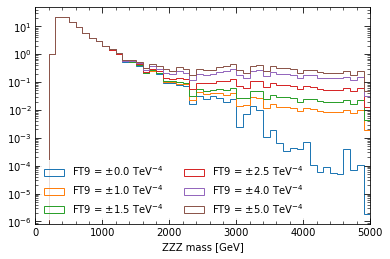

In [37]:
bins = np.linspace(0, 5000, 51)
for label in ft9_weights:
    if "m" in label:
        continue
    plt.hist(s_hat, bins=bins, weights=weights[label], histtype="step",
             label=f"FT9 = ±{to_number(label[4:])}"+" TeV${}^{-4}$")
plt.gca().set_yscale('log')
plt.legend(loc="lower left", ncol=2)
plt.xlim(0, 5000)
plt.xlabel("ZZZ mass [GeV]")
plt.show()

A quick study which counts events above an invariant mass of 2 TeV and verifies to parabolic behavior of this yield:

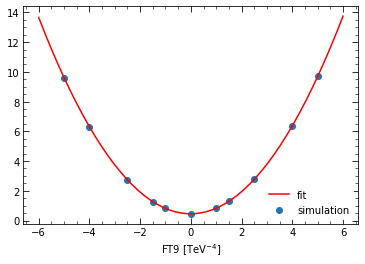

In [38]:
mass_cut = 2000.0

ft9_values = np.zeros(len(ft9_weights))
yields = np.zeros(len(ft9_weights))

for i, label in enumerate(ft9_weights):
    ft9_values[i] = to_number(label[4:])
    yields[i] = np.sum(weights[label][s_hat > mass_cut])
    
p_fit = np.polyfit(ft9_values, yields, deg=2)

x = np.linspace(-6, 6)
plt.scatter(ft9_values, yields, label="simulation")
plt.plot(x, np.polyval(p_fit, x), color='r', label="fit")
plt.legend(loc="lower right")
plt.xlabel("FT9 [TeV${}^{-4}$]")
plt.show()

We can also see how many MC events we have for each bin:

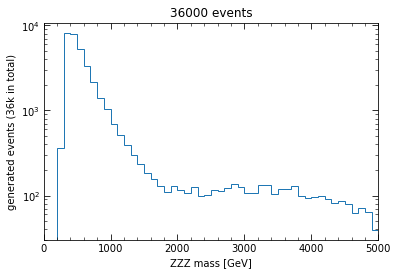

In [75]:
bins = np.linspace(0, 5000, 51)
plt.hist(s_hat, bins=bins, histtype="step")
plt.gca().set_yscale('log')
plt.xlim(0, 5000)
plt.xlabel("ZZZ mass [GeV]")
plt.ylabel(f"generated events ({int(len(weights)/1000)}k in total)")
plt.title("36000 events")
plt.savefig("n_events_ft9.png")